In [1]:
GSEA_PATH = "/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/gsea"

In [2]:
import pandas as pd

# Figuring out the nuts and bolts of consoldating enrichment results across visits

In [4]:
visits = ["BL", "V02", "V04", "V06", "V08"]

gsea_dfs_raw = {}
for visit in visits:
    gsea_dfs_raw[visit] = pd.read_csv(f"{GSEA_PATH}/enr_results_sorted_Male_{visit}_50-70.csv")

In [13]:
common_terms = set.intersection(*(set(df['Term']) for df in gsea_dfs_raw.values()))
rows_with_common_terms = pd.concat([df[df['Term'].isin(common_terms)] for df in gsea_dfs_raw.values()], ignore_index=True)
rows_with_common_terms = rows_with_common_terms.sort_values(by="Adjusted P-value", ascending=True)

In [14]:
rows_with_common_terms

,Unnamed: 0,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
358,422,ARCHS4_TFs_Coexp,MXI1 human tf ARCHS4 coexpression,10/299,1.348686e-15,2.306253e-13,0,0,136.304498,4667.017736,EPB42;OR2W3;EPB41;TRIM58;E2F2;SLC4A1;RUNDC3A;S...
359,424,ARCHS4_TFs_Coexp,JAZF1 human tf ARCHS4 coexpression,8/299,1.335258e-11,7.610973e-10,0,0,77.345115,1936.668413,EPB42;OR2W3;EPB41;TRIM58;RUNDC3A;SPTB;ANK1;OSBP2
361,428,ARCHS4_TFs_Coexp,TAL1 human tf ARCHS4 coexpression,7/299,9.036820e-10,2.207566e-08,0,0,59.011558,1228.888768,EPB42;OR2W3;ITGB3;TRIM58;E2F2;SPTB;OSBP2
360,425,ARCHS4_TFs_Coexp,E2F2 human tf ARCHS4 coexpression,7/299,9.036820e-10,2.207566e-08,0,0,59.011558,1228.888768,EPB42;OR2W3;TRIM58;SLC4A1;SPTB;ANK1;OSBP2
362,426,ARCHS4_TFs_Coexp,GATA1 human tf ARCHS4 coexpression,7/299,9.036820e-10,2.207566e-08,0,0,59.011558,1228.888768,SLC6A8;EPB42;OR2W3;TRIM58;SPTB;ANK1;OSBP2
...,...,...,...,...,...,...,...,...,...,...,...
169,1901,ENCODE_TF_ChIP-seq_2014,POL2 PROGFIB,5/7413,9.989851e-01,9.999966e-01,0,0,0.292275,0.000297,SAMD14;SEC14L5;XIST;NRGN;PTPRG
154,1995,ENCODE_TF_ChIP-seq_2014,POL2 MCF7,6/9679,9.999559e-01,9.999966e-01,0,0,0.228021,0.000010,EGR1;SAMD14;SEC14L5;VWCE;NRGN;PTPRG
152,2006,ENCODE_TF_ChIP-seq_2014,CMYC K562,5/9207,9.999747e-01,9.999966e-01,0,0,0.201680,0.000005,EGR1;SEC14L5;FOSB;AP3B2;NRGN
159,2000,ENCODE_TF_ChIP-seq_2014,POL2 K562,6/9754,9.999625e-01,9.999966e-01,0,0,0.224618,0.000008,EGR1;SEC14L5;FOSB;GP1BA;VWCE;NRGN


# Figuring out visualizations per Term - a bird's eye view on the results

In [15]:
GSEA_RES_PATH = "/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/gsea/dge_enr_results"

In [16]:
enr_consolidated_male_50_70 = pd.read_csv(f"{GSEA_RES_PATH}/enr_results_sorted_common_terms_Male_50-70.csv")

In [40]:
enr_consolidated_male_50_70.head()

,Unnamed: 0.1,Unnamed: 0,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,Gene_list
0,358,422,ARCHS4_TFs_Coexp,MXI1 human tf ARCHS4 coexpression,10/299,1.348686e-15,2.306253e-13,0,0,136.304498,4667.017736,EPB42;OR2W3;EPB41;TRIM58;E2F2;SLC4A1;RUNDC3A;S...,"[EPB42, OR2W3, EPB41, TRIM58, E2F2, SLC4A1, RU..."
1,359,424,ARCHS4_TFs_Coexp,JAZF1 human tf ARCHS4 coexpression,8/299,1.335258e-11,7.610973e-10,0,0,77.345115,1936.668413,EPB42;OR2W3;EPB41;TRIM58;RUNDC3A;SPTB;ANK1;OSBP2,"[EPB42, OR2W3, EPB41, TRIM58, RUNDC3A, SPTB, A..."
2,361,428,ARCHS4_TFs_Coexp,TAL1 human tf ARCHS4 coexpression,7/299,9.036820e-10,2.207566e-08,0,0,59.011558,1228.888768,EPB42;OR2W3;ITGB3;TRIM58;E2F2;SPTB;OSBP2,"[EPB42, OR2W3, ITGB3, TRIM58, E2F2, SPTB, OSBP2]"
3,360,425,ARCHS4_TFs_Coexp,E2F2 human tf ARCHS4 coexpression,7/299,9.036820e-10,2.207566e-08,0,0,59.011558,1228.888768,EPB42;OR2W3;TRIM58;SLC4A1;SPTB;ANK1;OSBP2,"[EPB42, OR2W3, TRIM58, SLC4A1, SPTB, ANK1, OSBP2]"
4,362,426,ARCHS4_TFs_Coexp,GATA1 human tf ARCHS4 coexpression,7/299,9.036820e-10,2.207566e-08,0,0,59.011558,1228.888768,SLC6A8;EPB42;OR2W3;TRIM58;SPTB;ANK1;OSBP2,"[SLC6A8, EPB42, OR2W3, TRIM58, SPTB, ANK1, OSBP2]"


In [41]:
enr_consolidated_male_50_70.shape

(892, 13)

In [18]:
filtered_enrichment = enr_consolidated_male_50_70[enr_consolidated_male_50_70['Adjusted P-value'] <= 0.05]

In [19]:
filtered_enrichment

,Unnamed: 0.1,Unnamed: 0,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,358,422,ARCHS4_TFs_Coexp,MXI1 human tf ARCHS4 coexpression,10/299,1.348686e-15,2.306253e-13,0,0,136.304498,4667.017736,EPB42;OR2W3;EPB41;TRIM58;E2F2;SLC4A1;RUNDC3A;S...
1,359,424,ARCHS4_TFs_Coexp,JAZF1 human tf ARCHS4 coexpression,8/299,1.335258e-11,7.610973e-10,0,0,77.345115,1936.668413,EPB42;OR2W3;EPB41;TRIM58;RUNDC3A;SPTB;ANK1;OSBP2
2,361,428,ARCHS4_TFs_Coexp,TAL1 human tf ARCHS4 coexpression,7/299,9.036820e-10,2.207566e-08,0,0,59.011558,1228.888768,EPB42;OR2W3;ITGB3;TRIM58;E2F2;SPTB;OSBP2
3,360,425,ARCHS4_TFs_Coexp,E2F2 human tf ARCHS4 coexpression,7/299,9.036820e-10,2.207566e-08,0,0,59.011558,1228.888768,EPB42;OR2W3;TRIM58;SLC4A1;SPTB;ANK1;OSBP2
4,362,426,ARCHS4_TFs_Coexp,GATA1 human tf ARCHS4 coexpression,7/299,9.036820e-10,2.207566e-08,0,0,59.011558,1228.888768,SLC6A8;EPB42;OR2W3;TRIM58;SPTB;ANK1;OSBP2
5,536,310,ARCHS4_TFs_Coexp,MXI1 human tf ARCHS4 coexpression,6/299,2.883101e-08,1.403109e-06,0,0,50.408703,875.186533,OR2W3;TRIM58;E2F2;RUNDC3A;SPTB;OSBP2
6,537,309,ARCHS4_TFs_Coexp,TAL1 human tf ARCHS4 coexpression,6/299,2.883101e-08,1.403109e-06,0,0,50.408703,875.186533,OR2W3;ITGB3;TRIM58;E2F2;SPTB;OSBP2
7,538,312,ARCHS4_TFs_Coexp,GATA1 human tf ARCHS4 coexpression,5/299,1.294560e-06,3.780116e-05,0,0,37.210884,504.480594,SLC6A8;OR2W3;TRIM58;SPTB;OSBP2
8,539,313,ARCHS4_TFs_Coexp,JAZF1 human tf ARCHS4 coexpression,5/299,1.294560e-06,3.780116e-05,0,0,37.210884,504.480594,OR2W3;TRIM58;RUNDC3A;SPTB;OSBP2
9,363,3336,TF_Perturbations_Followed_by_Expression,LIN28 OE CD34 HUMAN GSE93256 RNASEQ UP,6/411,3.106441e-07,1.248789e-04,0,0,32.230453,482.961016,TRIM58;E2F2;SLC4A1;SPTB;ANK1;TENT5C


/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_36908/1964853007.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_enrichment['Gene_list'] = filtered_enrichment['Genes'].str.split(';')


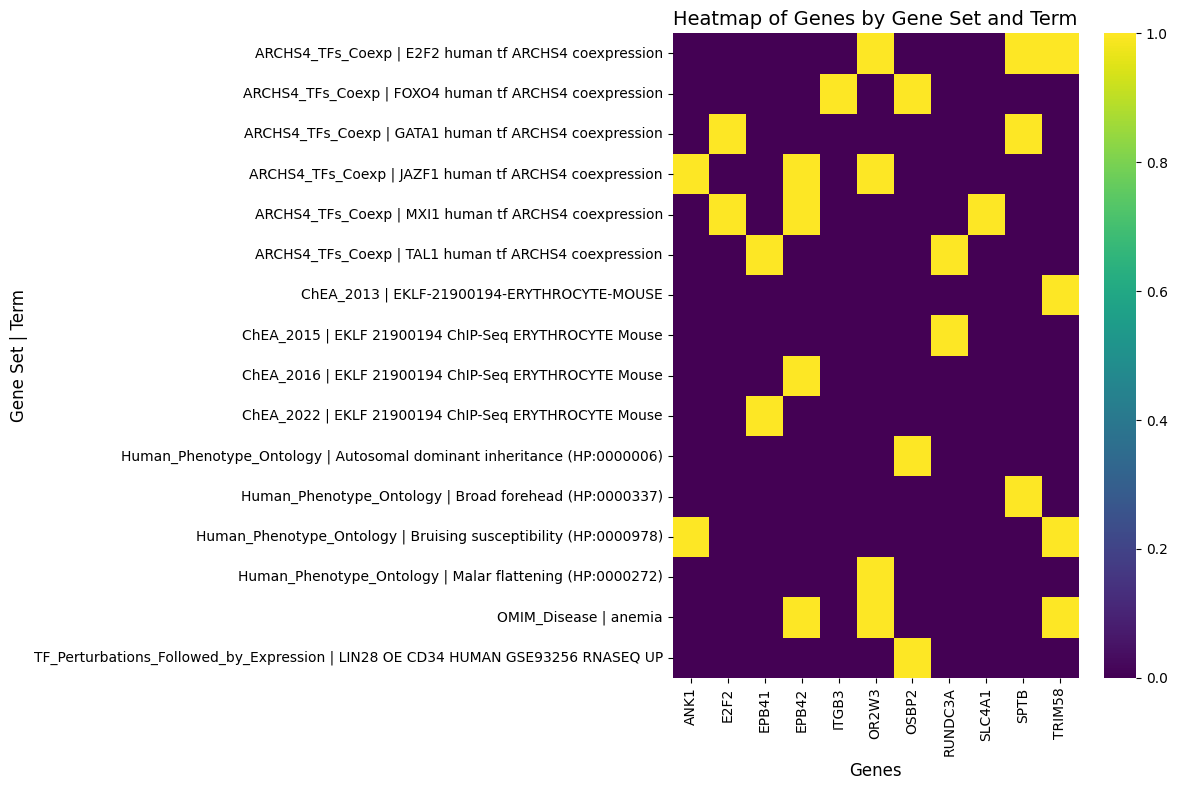

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Split the genes by semicolon and explode the DataFrame to create one row per gene
filtered_enrichment['Gene_list'] = filtered_enrichment['Genes'].str.split(';')
df_exploded = filtered_enrichment.explode('Gene_list', ignore_index=True)

# Create a pivot table with genes as columns and rows as concatenation of Gene_set and Term
heatmap_data = df_exploded.pivot_table(
    index=filtered_enrichment['Gene_set'] + " | " + filtered_enrichment['Term'],
    columns='Gene_list',
    aggfunc='size',
    fill_value=0
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(heatmap_data, cmap='viridis', cbar=True)
heatmap.set_title('Heatmap of Genes by Gene Set and Term', fontsize=14)
heatmap.set_xlabel('Genes', fontsize=12)
heatmap.set_ylabel('Gene Set | Term', fontsize=12)

# Rotate column labels (gene names) to be vertical
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

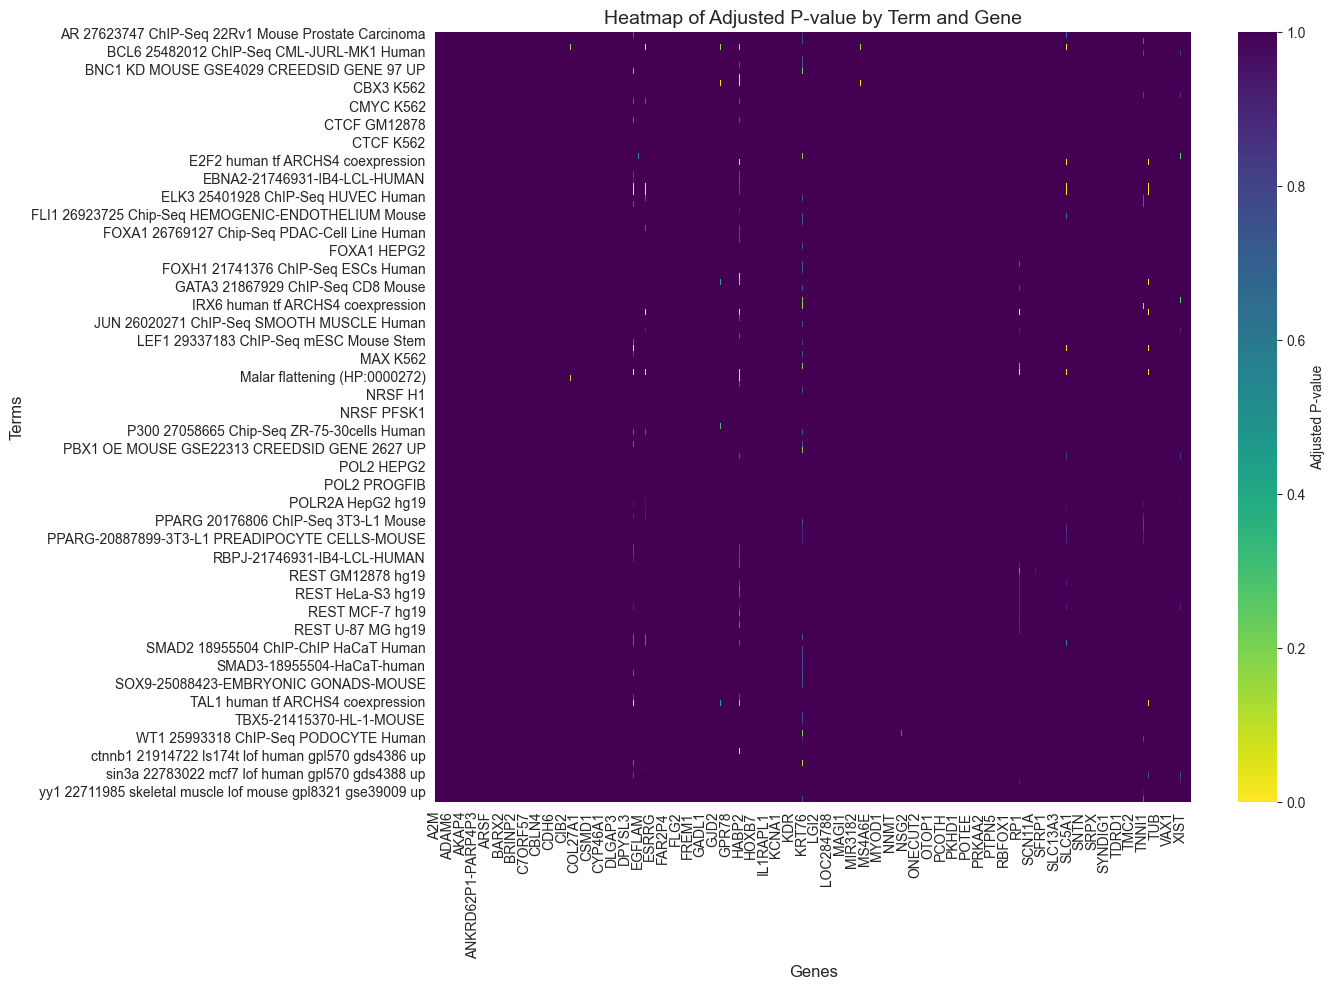

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Explode the genes into separate rows for better heatmap creation
enr_consolidated_male_50_70['Gene_list'] = enr_consolidated_male_50_70['Genes'].str.split(';')
df_exploded = enr_consolidated_male_50_70.explode('Gene_list', ignore_index=True)

# Create a pivot table with terms as rows, genes as columns, and adjusted p-values as values
heatmap_data = df_exploded.pivot_table(
    index='Term',
    columns='Gene_list',
    values='Adjusted P-value',
    aggfunc='min',
    fill_value=1  # Fill NaN with a non-significant value
)

# Plot the heatmap
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(
    heatmap_data,
    cmap='viridis_r',
    cbar_kws={'label': 'Adjusted P-value'},
    vmin=0,
    vmax=0.05
)
heatmap.set_title('Heatmap of Adjusted P-value by Term and Gene', fontsize=14)
heatmap.set_xlabel('Genes', fontsize=12)
heatmap.set_ylabel('Terms', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [26]:
!pip install networkx pyvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 5.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [27]:
import networkx as nx
from pyvis.network import Network

In [ ]:
G = nx.Graph()

for _, row in filtered_enrichment.iterrows():
    G.add_node(
        row["Term"],
        p_value=row["Adjusted P-value"],
        category=row["Gene_set"],
        title=f"Term: {row['Term']}<br>P-value: {row['Adjusted P-value']}",  # Hover tooltip
        size=10 * (1 - row["Adjusted P-value"])  # Larger nodes for more significant terms
    )

# Add edges based on shared genes
for i, row1 in filtered_enrichment.iterrows():
    genes1 = set(row1["Genes"].split(","))
    for j, row2 in filtered_enrichment.iterrows():
        if i < j:  # Avoid duplicate edges
            genes2 = set(row2["Genes"].split(","))
            shared_genes = genes1 & genes2
            if shared_genes:
                G.add_edge(
                    row1["Term"],
                    row2["Term"],
                    weight=len(shared_genes),
                    title=f"Shared genes: {', '.join(shared_genes)}"  # Edge tooltip
                )

# ===== 3. Visualize with PyVis =====
net = Network(notebook=True, height="600px", width="100%", bgcolor="white", font_color="black")

# Transfer nodes/edges from NetworkX to PyVis
net.from_nx(G)

# Customize node colors by category
category_colors = {"Biological": "#ff7f0e", "Cellular": "#1f77b4"}
for node in net.nodes:
    node["color"] = category_colors.get(node["category"], "gray")

# Adjust physics for better layout
net.toggle_physics(True)
net.show_buttons(filter_=["physics"])  # Add configuration UI

# Save and display
net.show("enrichment_network.html")

KeyError: 'weight'

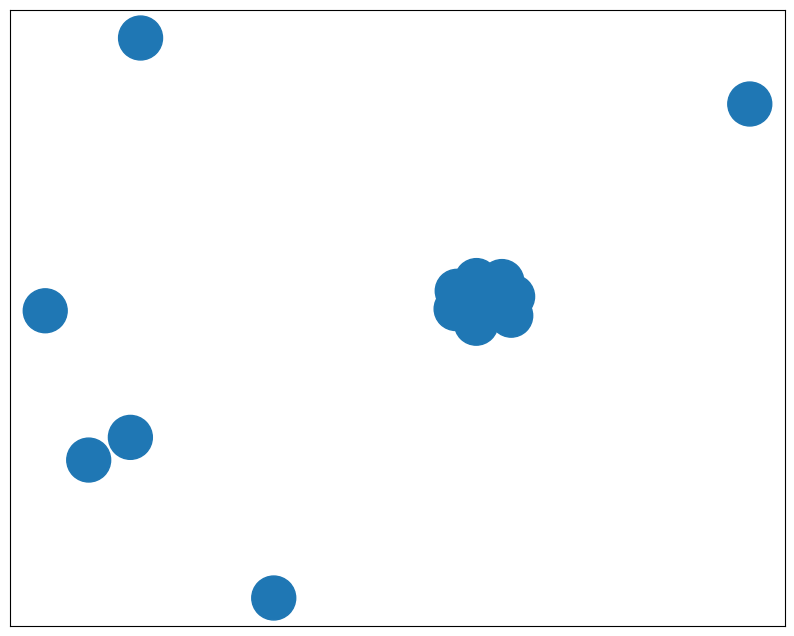